# models behavior comparison

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"
import seaborn as sns 
import ast
from scipy.stats import pearsonr
from statsmodels.stats.multitest import fdrcorrection
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FixedLocator
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform
import warnings
warnings.filterwarnings("ignore")
from scipy.spatial.distance import correlation
from scipy.stats import spearmanr
from scipy.stats import sem
from matplotlib.ticker import FixedLocator
from scipy.optimize import curve_fit
from scipy.optimize import OptimizeWarning
import warnings


In [2]:
output_dir = r"29_RL_agent_TD_learn_models_behavior_across_models"
os.makedirs(output_dir, exist_ok=True)


folder_path_participants = 'data_risk_added'

folder_path_greedy = '13_RL_agent_TDlearn_output/model_behavior'
folder_path_softmax = '13_RL_agent_TDlearn_output_softmax/model_behavior'
folder_path_dualQ = '13_RL_agent_TDlearn_output_risk_dualQ/model_behavior'
folder_path_rs = '13_RL_agent_TDlearn_output_risk_sensitive/model_behavior'
folder_path_wsls = '13_RL_agent_TDlearn_output_wsls/model_behavior'


df_participants = []
df_greedy = []
df_softmax = []
df_dualQ = []
df_rs = []
df_wsls = []



def find_matching_csv(folder_path, df_list):
            for csv_file in os.listdir(folder_path):
                if clean_name in csv_file and csv_file.endswith('.csv'):
                    csv_path = os.path.join(folder_path, csv_file)
                    df_csv = pd.read_csv(csv_path)
                    df_list.append(df_csv)





for file_name in os.listdir(folder_path_participants):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path_participants, file_name)
        df = pd.read_excel(file_path)
        df = df[df['outcome'].str.lower() != 'na'].reset_index(drop=True) 
        df_participants.append(df)

        clean_name = file_name.removeprefix("task_data_").removesuffix(".xlsx")


        find_matching_csv(folder_path_greedy, df_greedy)
        find_matching_csv(folder_path_softmax, df_softmax)
        find_matching_csv(folder_path_dualQ, df_dualQ)
        find_matching_csv(folder_path_rs, df_rs)
        find_matching_csv(folder_path_wsls, df_wsls)

In [3]:
for i in range(len(df_participants)):
    block = df_participants[i]['block']
    
    for df_list in [df_participants, df_wsls, df_greedy, df_softmax, df_dualQ, df_rs]:
        df_list[i]['block'] = block

In [4]:

for df in df_participants:
    df['block_type'] = None
    df.loc[df['block'] == 4, 'block_type'] = 'mix'              # block 4 is mix
    df.loc[df['block'].isin([1, 2, 3]), 'block_type'] = 'fix'   # else is fix

    

for df in df_greedy:
    df['block_type'] = None
    df.loc[df['block'] == 4, 'block_type'] = 'mix'              # block 4 is mix
    df.loc[df['block'].isin([1, 2, 3]), 'block_type'] = 'fix'   # else is fix   

for df in df_softmax:
    df['block_type'] = None
    df.loc[df['block'] == 4, 'block_type'] = 'mix'              # block 4 is mix
    df.loc[df['block'].isin([1, 2, 3]), 'block_type'] = 'fix'   # else is fix


for df in df_dualQ:
    df['block_type'] = None
    df.loc[df['block'] == 4, 'block_type'] = 'mix'              # block 4 is mix
    df.loc[df['block'].isin([1, 2, 3]), 'block_type'] = 'fix'   # else is fix

for df in df_rs:
    df['block_type'] = None
    df.loc[df['block'] == 4, 'block_type'] = 'mix'              # block 4 is mix
    df.loc[df['block'].isin([1, 2, 3]), 'block_type'] = 'fix'   # else is fix

for df in df_wsls:
    df['block_type'] = None
    df.loc[df['block'] == 4, 'block_type'] = 'mix'              # block 4 is mix
    df.loc[df['block'].isin([1, 2, 3]), 'block_type'] = 'fix'   # else is fix




# adding myCard and youCard to the models dataset and also adding model_outcome

In [5]:
for i in range(len(df_participants)):
    myCard = df_participants[i]['myCard']
    yourCard = df_participants[i]['yourCard']
    distributions = df_participants[i]['distribution']
    block_type = df_participants[i]['block_type']
    
    for df_list in [df_participants, df_wsls, df_greedy, df_softmax, df_dualQ, df_rs]:
        df_list[i]['myCard'] = myCard
        df_list[i]['yourCard'] = yourCard
        df_list[i]['distribution'] = distributions
        df_list[i]['block_type'] = block_type

# adding model outcome

In [6]:
for df in df_wsls:
    outcomes = []
    for i in range(len(df)):
        my = df.loc[i, 'myCard']
        your = df.loc[i, 'yourCard']
        choice = df.loc[i, 'model_choices']
        
        if ((my > your and choice == 1) or (my < your and choice == 0)):
            outcomes.append('win')
        else:
            outcomes.append('lose')
    
    df['outcome'] = outcomes



for df in df_greedy:
    outcomes = []
    for i in range(len(df)):
        my = df.loc[i, 'myCard']
        your = df.loc[i, 'yourCard']
        choice = df.loc[i, 'model_choices']
        
        if ((my > your and choice == 1) or (my < your and choice == 0)):
            outcomes.append('win')
        else:
            outcomes.append('lose')
    
    df['outcome'] = outcomes
    
    


for df in df_softmax:
    outcomes = []
    for i in range(len(df)):
        my = df.loc[i, 'myCard']
        your = df.loc[i, 'yourCard']
        choice = df.loc[i, 'model_choices']
        
        if ((my > your and choice == 1) or (my < your and choice == 0)):
            outcomes.append('win')
        else:
            outcomes.append('lose')
    
    df['outcome'] = outcomes
    
    

for df in df_dualQ:
    outcomes = []
    for i in range(len(df)):
        my = df.loc[i, 'myCard']
        your = df.loc[i, 'yourCard']
        choice = df.loc[i, 'model_choices']
        
        if ((my > your and choice == 1) or (my < your and choice == 0)):
            outcomes.append('win')
        else:
            outcomes.append('lose')
    
    df['outcome'] = outcomes


for df in df_rs:
    outcomes = []
    for i in range(len(df)):
        my = df.loc[i, 'myCard']
        your = df.loc[i, 'yourCard']
        choice = df.loc[i, 'model_choices']
        
        if ((my > your and choice == 1) or (my < your and choice == 0)):
            outcomes.append('win')
        else:
            outcomes.append('lose')
    
    df['outcome'] = outcomes

In [7]:
df_participants[2]

,arrowRT,distribution,interTrialInterval,outcome,myCard,yourCard,spaceRT,totalReward,trialIndex,trialType,choice,block,timeoutRepeat,is_within_IQR,risk,block_type
0,2609,uniform,789,lose,4,2,335,9.5,0,response,arrowdown,1,0,1,0.375,fix
1,597,uniform,853,win,9,4,407,10,1,response,arrowup,1,0,1,0.000,fix
2,188,uniform,904,win,4,7,504,10.5,2,response,arrowdown,1,0,1,0.375,fix
3,423,uniform,916,win,2,4,434,11,3,response,arrowdown,1,0,1,0.125,fix
4,549,uniform,806,win,5,7,287,11.5,4,response,arrowdown,1,0,1,0.500,fix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,761,high,913,win,7,8,382,80,125,response,arrowdown,4,0,1,0.447,mix
266,596,low,921,win,4,3,318,80.5,83,response,arrowup,4,0,1,0.385,mix
267,414,low,950,win,2,7,335,81,77,response,arrowdown,4,0,1,0.243,mix
268,1371,uniform,842,win,6,4,615,81.5,35,response,arrowup,4,0,1,0.375,mix


In [8]:
df_greedy[2]

,model_choices,participant_choices,model_total_reward,participant_total_reward,q_val,block,block_type,myCard,yourCard,distribution,outcome
0,1,0,10.5,9.5,"[[[0.022019422455794066, 0.02059341150055373],...",1,fix,4,2,uniform,win
1,1,1,11.0,10.0,"[[[0.022019422455794066, 0.02059341150055373],...",1,fix,9,4,uniform,win
2,0,0,11.5,10.5,"[[[0.022019422455794066, 0.02059341150055373],...",1,fix,4,7,uniform,win
3,0,0,12.0,11.0,"[[[0.022019422455794066, 0.02059341150055373],...",1,fix,2,4,uniform,win
4,1,0,11.5,11.5,"[[[0.022019422455794066, 0.02059341150055373],...",1,fix,5,7,uniform,lose
...,...,...,...,...,...,...,...,...,...,...,...
265,0,0,78.0,80.0,"[[[0.4991753037517269, 0.02059341150055373], [...",4,mix,7,8,high,win
266,1,1,78.5,80.5,"[[[0.4991753037517269, 0.02059341150055373], [...",4,mix,4,3,low,win
267,0,0,79.0,81.0,"[[[0.4991753037517269, 0.02059341150055373], [...",4,mix,2,7,low,win
268,1,1,79.5,81.5,"[[[0.4991753037517269, 0.02059341150055373], [...",4,mix,6,4,uniform,win


# total reward

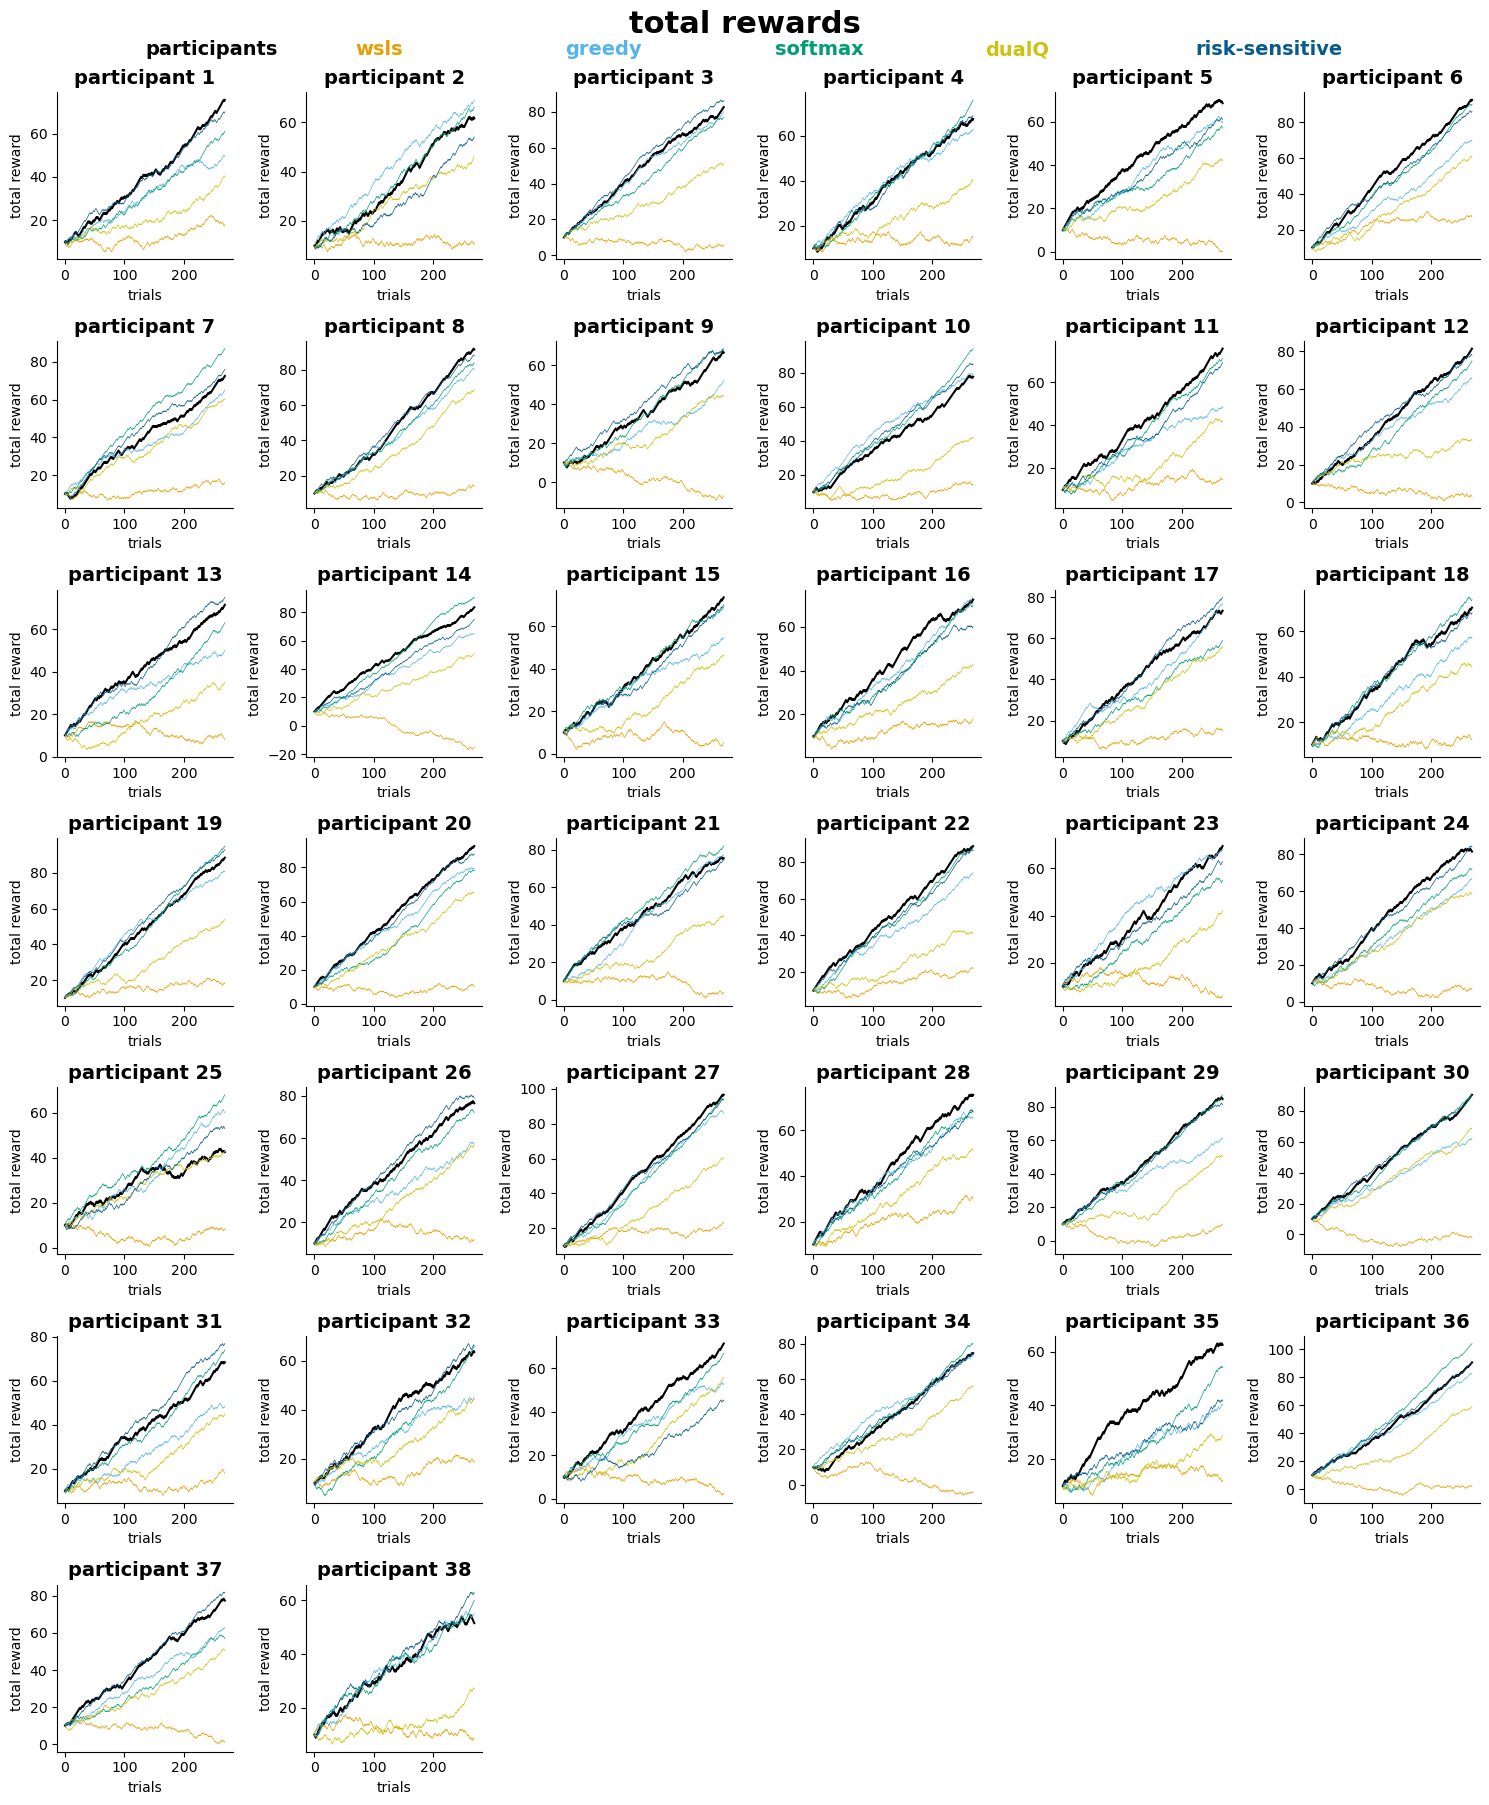

In [9]:
num_subplots = len(df_participants)
trial_num = len(df_participants[0])

fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(15, 18))
axes = axes.flatten()



labels = ['participants','wsls','greedy', 'softmax',  'dualQ', 'risk-sensitive']
colors = ['black','#E69F00', '#56B4E9', '#009E73', "#CEC10F", "#065B8D"]


for i in range(num_subplots):
    ax = axes[i]

    ax.plot(range(trial_num), (df_participants[i]['totalReward'] - df_participants[i]['totalReward'].iloc[0] )+10, label=labels[0], color=colors[0], linewidth=1.5)
    ax.plot(range(trial_num), df_wsls[i]['model_total_reward'], label=labels[1], color=colors[1], linewidth=0.5)
    ax.plot(range(trial_num), df_greedy[i]['model_total_reward'], label=labels[2], color=colors[2], linewidth=0.5)
    ax.plot(range(trial_num), df_softmax[i]['model_total_reward'], label=labels[3], color=colors[3], linewidth=0.5)
    ax.plot(range(trial_num), df_dualQ[i]['model_total_reward'], label=labels[4], color=colors[4], linewidth=0.5)
    ax.plot(range(trial_num), df_rs[i]['model_total_reward'], label=labels[5], color=colors[5], linewidth=0.5)


    ax.set_title(f'participant {i+1}' , fontsize=14, fontweight='bold')
    ax.set_xlabel('trials')
    ax.set_ylabel('total reward')
    # ax.legend(frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for j in range(num_subplots, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('total rewards', fontsize=22, fontweight='bold', y=1)


# Add colored legend text under the title
x_start = 0.1
x_spacing = 0.14
y_pos = 0.975  # Slightly below suptitle

for idx, (label, color) in enumerate(zip(labels, colors)):
    fig.text(x_start + idx * x_spacing, y_pos, label, fontsize=14, color=color, fontweight='bold')




plt.tight_layout(rect=[0, 0, 1, 1]) 

filename = os.path.join(output_dir, "total_reward.pdf")
plt.savefig(filename, format='pdf')

# plt.close()


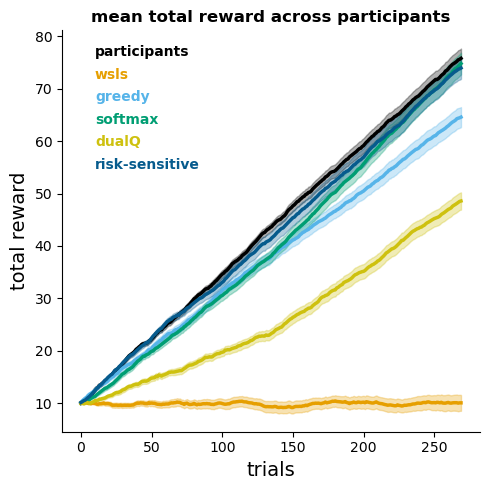

In [10]:

trial_num = len(df_participants[0])

# Convert all reward trajectories to NumPy arrays (as float)
participant_rewards = np.stack([
    ((df['totalReward'] - df['totalReward'].iloc[0]) + 10).astype(float).values for df in df_participants
])
wsls_rewards = np.stack([df['model_total_reward'].astype(float).values for df in df_wsls])
greedy_rewards = np.stack([df['model_total_reward'].astype(float).values for df in df_greedy])
softmax_rewards = np.stack([df['model_total_reward'].astype(float).values for df in df_softmax])
dualQ_rewards = np.stack([df['model_total_reward'].astype(float).values for df in df_dualQ])
rs_rewards = np.stack([df['model_total_reward'].astype(float).values for df in df_rs])

# Compute mean and SEM manually
def mean_and_sem(data):
    mean = np.mean(data, axis=0)
    sem_val = np.std(data, axis=0, ddof=1) / np.sqrt(data.shape[0])
    return mean, sem_val

data_groups = [participant_rewards, wsls_rewards, greedy_rewards, softmax_rewards, dualQ_rewards, rs_rewards]
labels = ['participants', 'wsls', 'greedy', 'softmax', 'dualQ', 'risk-sensitive']
colors = ['black', '#E69F00', '#56B4E9', '#009E73', "#CEC10F", "#065B8D"]

# Plot
fig, ax = plt.subplots(figsize=(5, 5))

for data, label, color in zip(data_groups, labels, colors):
    mean_vals, sem_vals = mean_and_sem(data)
    ax.plot(range(trial_num), mean_vals, label=label, color=color, linewidth=2.5)
    ax.fill_between(range(trial_num), mean_vals - sem_vals, mean_vals + sem_vals, color=color, alpha=0.3)

# Style
ax.set_title("mean total reward across participants", fontsize=12, fontweight='bold')
ax.set_xlabel("trials", fontsize=14)
ax.set_ylabel("total reward", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Custom legend (stacked vertically inside top-left corner)
x_pos = 0.2   # left padding
y_start = 0.9 # top position
y_spacing = 0.045  # vertical spacing between labels

for idx, (label, color) in enumerate(zip(labels, colors)):
    fig.text(x_pos, y_start - idx * y_spacing, label,
             fontsize=10, color=color, fontweight='bold',
             ha='left', va='top')


plt.tight_layout(rect=[0, 0, 1, 1])

# Save
filename = os.path.join(output_dir, "total_reward_across_all.pdf")
plt.savefig(filename, format='pdf')

# plt.close()


# accuracy

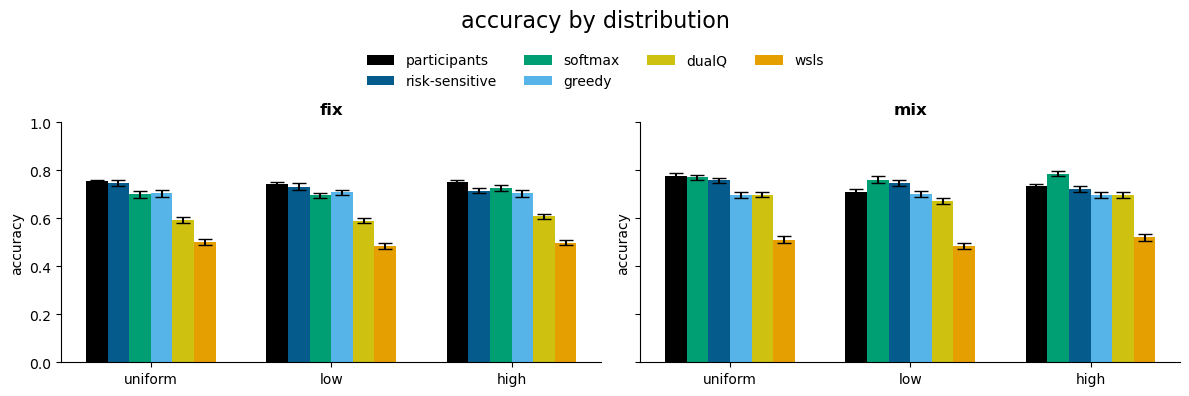

In [11]:
def compute_win_rates_by_block_type(df_list, x_labels=['uniform', 'low', 'high']):
    win_rates_mix = []
    win_rates_non_mix = []

    for df in df_list:
        df['is_win'] = df['outcome'].apply(lambda x: 1 if x == 'win' else 0)

        df_mix = df[df['block_type'] == 'mix']
        df_non_mix = df[df['block_type'] != 'mix']

        if not df_mix.empty:
            total_trials_mix = df_mix.groupby('distribution').size().reset_index(name='total_trials')
            wins_mix = df_mix.groupby('distribution')['is_win'].sum().reset_index(name='wins')
            win_rate_mix = pd.merge(total_trials_mix, wins_mix, on='distribution')
            win_rate_mix['win_rate'] = win_rate_mix['wins'] / win_rate_mix['total_trials']
            win_rates_mix.append(win_rate_mix[['distribution', 'win_rate']])

        if not df_non_mix.empty:
            total_trials_non_mix = df_non_mix.groupby('distribution').size().reset_index(name='total_trials')
            wins_non_mix = df_non_mix.groupby('distribution')['is_win'].sum().reset_index(name='wins')
            win_rate_non_mix = pd.merge(total_trials_non_mix, wins_non_mix, on='distribution')
            win_rate_non_mix['win_rate'] = win_rate_non_mix['wins'] / win_rate_non_mix['total_trials']
            win_rates_non_mix.append(win_rate_non_mix[['distribution', 'win_rate']])

    def compute_group_stats(win_rates_list):
        combined = pd.concat(win_rates_list)
        mean = combined.groupby('distribution')['win_rate'].mean().reset_index()
        std = combined.groupby('distribution')['win_rate'].std().reset_index()
        stats = mean.merge(std, on='distribution', suffixes=('_mean', '_std'))
        stats['distribution'] = pd.Categorical(stats['distribution'], categories=x_labels, ordered=True)
        return stats.sort_values(by='distribution').reset_index(drop=True)

    return compute_group_stats(win_rates_mix), compute_group_stats(win_rates_non_mix), win_rates_mix, win_rates_non_mix



#  participants
mean_win_rates_df_participants_mix, mean_win_rates_df_participants_non_mix, win_rates_mix, win_rates_non_mix = compute_win_rates_by_block_type(df_participants)
#wsls
mean_win_rates_df_wsls_mix, mean_win_rates_df_wsls_non_mix, win_rates_wsls_mix, win_rates_wsls_non_mix = compute_win_rates_by_block_type(df_wsls)
#  greedy
mean_win_rates_df_greedy_mix, mean_win_rates_df_greedy_non_mix, win_rates_greedy_mix, win_rates_greedy_non_mix = compute_win_rates_by_block_type(df_greedy)
#  softmax
mean_win_rates_df_softmax_mix, mean_win_rates_df_softmax_non_mix, win_rates_softmax_mix, win_rates_softmax_non_mix = compute_win_rates_by_block_type(df_softmax)
#  dualQ
mean_win_rates_df_dualQ_mix, mean_win_rates_df_dualQ_non_mix, win_rates_dualQ_mix, win_rates_dualQ_non_mix = compute_win_rates_by_block_type(df_dualQ)
#  risk-sensitive
mean_win_rates_df_rs_mix, mean_win_rates_df_rs_non_mix, win_rates_rs_mix, win_rates_rs_non_mix = compute_win_rates_by_block_type(df_rs)





def compute_sem(win_rates_list):
    combined = pd.concat(win_rates_list)
    sem = combined.groupby('distribution')['win_rate'].sem().reset_index()
    return sem

mean_dfs_fix = [mean_win_rates_df_participants_non_mix, 
                mean_win_rates_df_wsls_non_mix, 
                mean_win_rates_df_greedy_non_mix, 
                mean_win_rates_df_softmax_non_mix, 
                mean_win_rates_df_dualQ_non_mix, 
                mean_win_rates_df_rs_non_mix]

mean_dfs_mix = [mean_win_rates_df_participants_mix, 
                mean_win_rates_df_wsls_mix, 
                mean_win_rates_df_greedy_mix,
                mean_win_rates_df_softmax_mix,
                mean_win_rates_df_dualQ_mix,
                mean_win_rates_df_rs_mix]


sem_dfs_fix = [compute_sem(lst) for lst in [
    win_rates_non_mix, 
    win_rates_wsls_non_mix, 
    win_rates_greedy_non_mix, 
    win_rates_softmax_non_mix, 
    win_rates_dualQ_non_mix, 
    win_rates_rs_non_mix
]]

sem_dfs_mix = [compute_sem(lst) for lst in [
    win_rates_mix, 
    win_rates_wsls_mix, 
    win_rates_greedy_mix, 
    win_rates_softmax_mix, 
    win_rates_dualQ_mix, 
    win_rates_rs_mix
]]

def get_sorted_indices(mean_dfs):
    # Compute average accuracy across distributions for each model (excluding participants)
    avg_accuracies = [df['win_rate_mean'].mean() for df in mean_dfs[1:]]
    sorted_indices = np.argsort(avg_accuracies)[::-1]  # descending order
    return sorted_indices

def reorder_lists(mean_dfs, sem_dfs, labels, colors):
    # Keep participants at front, reorder the rest
    sorted_idx = get_sorted_indices(mean_dfs)
    reordered_mean = [mean_dfs[0]] + [mean_dfs[i + 1] for i in sorted_idx]
    reordered_sem  = [sem_dfs[0]]  + [sem_dfs[i + 1] for i in sorted_idx]
    reordered_lbls = [labels[0]]   + [labels[i + 1] for i in sorted_idx]
    reordered_clrs = [colors[0]]   + [colors[i + 1] for i in sorted_idx]
    return reordered_mean, reordered_sem, reordered_lbls, reordered_clrs

# Reorder bars for plotting
re_mean_fix, re_sem_fix, re_labels_fix, re_colors_fix = reorder_lists(mean_dfs_fix, sem_dfs_fix, labels, colors)
re_mean_mix, re_sem_mix, re_labels_mix, re_colors_mix = reorder_lists(mean_dfs_mix, sem_dfs_mix, labels, colors)

x_labels = ['uniform', 'low', 'high']
x = np.arange(len(x_labels))
bar_width = 0.12

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

bars = []

for ax_idx, (ax, mean_dfs, sem_dfs, title, labels_ordered, colors_ordered) in enumerate(zip(
    axes,
    [re_mean_fix, re_mean_mix],
    [re_sem_fix, re_sem_mix],
    ['fix', 'mix'],
    [re_labels_fix, re_labels_mix],
    [re_colors_fix, re_colors_mix]
)):

    for i, (mean_df, sem_df, color, label) in enumerate(zip(mean_dfs, sem_dfs, colors_ordered, labels_ordered)):
        means = mean_df['win_rate_mean'].values
        errors = sem_df['win_rate'].values
        bar = ax.bar(x + i * bar_width, means, width=bar_width, label=label, color=color, yerr=errors, capsize=5)
        if ax_idx == 0:
            bars.append(bar[0])

    ax.set_title(f'{title}', fontweight='bold')
    ax.set_xticks(x + (len(mean_dfs) * bar_width) / 2 - bar_width / 2)
    ax.set_xticklabels(x_labels)
    ax.set_ylabel('accuracy')
    ax.set_ylim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.legend(bars, re_labels_fix, loc='upper center', ncol=4, frameon=False, bbox_to_anchor=(0.5, 0.9))
plt.suptitle('accuracy by distribution', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.88])
filename = os.path.join(output_dir, "accuracy_fix_mix.pdf")
plt.savefig(filename, format='pdf')
plt.show()

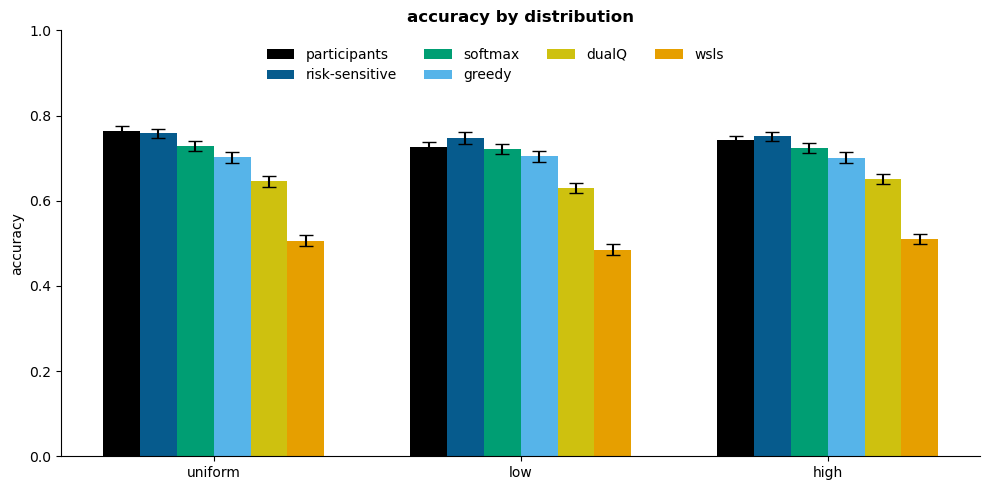

In [12]:

def compute_win_rates_by_block_type(df_list, x_labels=['uniform', 'low', 'high']):
    win_rates_mix = []
    win_rates_non_mix = []

    for df in df_list:
        df['is_win'] = df['outcome'].apply(lambda x: 1 if x == 'win' else 0)

        df_mix = df[df['block_type'] == 'mix']
        df_non_mix = df[df['block_type'] != 'mix']

        if not df_mix.empty:
            total_trials_mix = df_mix.groupby('distribution').size().reset_index(name='total_trials')
            wins_mix = df_mix.groupby('distribution')['is_win'].sum().reset_index(name='wins')
            win_rate_mix = pd.merge(total_trials_mix, wins_mix, on='distribution')
            win_rate_mix['win_rate'] = win_rate_mix['wins'] / win_rate_mix['total_trials']
            win_rates_mix.append(win_rate_mix[['distribution', 'win_rate']])

        if not df_non_mix.empty:
            total_trials_non_mix = df_non_mix.groupby('distribution').size().reset_index(name='total_trials')
            wins_non_mix = df_non_mix.groupby('distribution')['is_win'].sum().reset_index(name='wins')
            win_rate_non_mix = pd.merge(total_trials_non_mix, wins_non_mix, on='distribution')
            win_rate_non_mix['win_rate'] = win_rate_non_mix['wins'] / win_rate_non_mix['total_trials']
            win_rates_non_mix.append(win_rate_non_mix[['distribution', 'win_rate']])

    def compute_group_stats(win_rates_list):
        combined = pd.concat(win_rates_list)
        mean = combined.groupby('distribution')['win_rate'].mean().reset_index()
        std = combined.groupby('distribution')['win_rate'].std().reset_index()
        stats = mean.merge(std, on='distribution', suffixes=('_mean', '_std'))
        stats['distribution'] = pd.Categorical(stats['distribution'], categories=x_labels, ordered=True)
        return stats.sort_values(by='distribution').reset_index(drop=True)

    return compute_group_stats(win_rates_mix), compute_group_stats(win_rates_non_mix), win_rates_mix, win_rates_non_mix


def compute_sem(win_rates_list):
    combined = pd.concat(win_rates_list)
    sem = combined.groupby('distribution')['win_rate'].sem().reset_index()
    return sem

def get_sorted_indices(mean_dfs):
    avg_accuracies = [df['win_rate_mean'].mean() for df in mean_dfs[1:]]
    sorted_indices = np.argsort(avg_accuracies)[::-1]
    return sorted_indices

def reorder_lists(mean_dfs, sem_dfs, labels, colors):
    sorted_idx = get_sorted_indices(mean_dfs)
    reordered_mean = [mean_dfs[0]] + [mean_dfs[i + 1] for i in sorted_idx]
    reordered_sem  = [sem_dfs[0]]  + [sem_dfs[i + 1] for i in sorted_idx]
    reordered_lbls = [labels[0]]   + [labels[i + 1] for i in sorted_idx]
    reordered_clrs = [colors[0]]   + [colors[i + 1] for i in sorted_idx]
    return reordered_mean, reordered_sem, reordered_lbls, reordered_clrs

def combine_fix_mix_means_and_sems(mean_fix, mean_mix, sem_fix, sem_mix):
    combined_means = []
    combined_sems = []
    for df_fix, df_mix, se_fix, se_mix in zip(mean_fix, mean_mix, sem_fix, sem_mix):
        df_comb = df_fix.copy()
        df_comb['win_rate_mean'] = (df_fix['win_rate_mean'] + df_mix['win_rate_mean']) / 2
        sem_comb = se_fix.copy()
        sem_comb['win_rate'] = np.sqrt((se_fix['win_rate']**2 + se_mix['win_rate']**2) / 2)
        combined_means.append(df_comb)
        combined_sems.append(sem_comb)
    return combined_means, combined_sems



mean_win_rates_df_participants_mix, mean_win_rates_df_participants_non_mix, win_rates_mix, win_rates_non_mix = compute_win_rates_by_block_type(df_participants)
mean_win_rates_df_wsls_mix, mean_win_rates_df_wsls_non_mix, win_rates_wsls_mix, win_rates_wsls_non_mix = compute_win_rates_by_block_type(df_wsls)
mean_win_rates_df_greedy_mix, mean_win_rates_df_greedy_non_mix, win_rates_greedy_mix, win_rates_greedy_non_mix = compute_win_rates_by_block_type(df_greedy)
mean_win_rates_df_softmax_mix, mean_win_rates_df_softmax_non_mix, win_rates_softmax_mix, win_rates_softmax_non_mix = compute_win_rates_by_block_type(df_softmax)
mean_win_rates_df_dualQ_mix, mean_win_rates_df_dualQ_non_mix, win_rates_dualQ_mix, win_rates_dualQ_non_mix = compute_win_rates_by_block_type(df_dualQ)
mean_win_rates_df_rs_mix, mean_win_rates_df_rs_non_mix, win_rates_rs_mix, win_rates_rs_non_mix = compute_win_rates_by_block_type(df_rs)

mean_dfs_fix = [mean_win_rates_df_participants_non_mix, mean_win_rates_df_wsls_non_mix, mean_win_rates_df_greedy_non_mix, mean_win_rates_df_softmax_non_mix, mean_win_rates_df_dualQ_non_mix, mean_win_rates_df_rs_non_mix]
mean_dfs_mix = [mean_win_rates_df_participants_mix, mean_win_rates_df_wsls_mix, mean_win_rates_df_greedy_mix, mean_win_rates_df_softmax_mix, mean_win_rates_df_dualQ_mix, mean_win_rates_df_rs_mix]

sem_dfs_fix = [compute_sem(lst) for lst in [win_rates_non_mix, win_rates_wsls_non_mix, win_rates_greedy_non_mix, win_rates_softmax_non_mix, win_rates_dualQ_non_mix, win_rates_rs_non_mix]]
sem_dfs_mix = [compute_sem(lst) for lst in [win_rates_mix, win_rates_wsls_mix, win_rates_greedy_mix, win_rates_softmax_mix, win_rates_dualQ_mix, win_rates_rs_mix]]

labels = ['participants', 'wsls', 'greedy', 'softmax', 'dualQ', 'risk-sensitive']
colors = ['black', '#E69F00', '#56B4E9', '#009E73', "#CEC10F", "#065B8D"]

re_mean_fix, re_sem_fix, re_labels_fix, re_colors_fix = reorder_lists(mean_dfs_fix, sem_dfs_fix, labels, colors)
re_mean_mix, re_sem_mix, _, _ = reorder_lists(mean_dfs_mix, sem_dfs_mix, labels, colors)

combined_mean_dfs, combined_sem_dfs = combine_fix_mix_means_and_sems(re_mean_fix, re_mean_mix, re_sem_fix, re_sem_mix)

# ---- Step 3: final combined plot ----

x_labels = ['uniform', 'low', 'high']
x = np.arange(len(x_labels))
bar_width = 0.12

fig, ax = plt.subplots(figsize=(10, 5))
bars = []

for i, (mean_df, sem_df, color, label) in enumerate(zip(combined_mean_dfs, combined_sem_dfs, re_colors_fix, re_labels_fix)):
    means = mean_df['win_rate_mean'].values
    errors = sem_df['win_rate'].values
    bar = ax.bar(x + i * bar_width, means, width=bar_width, label=label, color=color, yerr=errors, capsize=5)
    bars.append(bar[0])

ax.set_title('accuracy by distribution', fontweight='bold')
ax.set_xticks(x + (len(combined_mean_dfs) * bar_width) / 2 - bar_width / 2)
ax.set_xticklabels(x_labels)
ax.set_ylabel('accuracy')
ax.set_ylim(0, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.legend(bars, re_labels_fix, loc='upper center', ncol=4, frameon=False, bbox_to_anchor=(0.5, 0.92))
plt.tight_layout(rect=[0, 0, 1, 1])


filename = os.path.join(output_dir, "accuracy.pdf")
plt.savefig(filename, format='pdf')
plt.show()


# arrow up down percentage

Fit failed for wsls | block: fix | dist: high: Covariance of the parameters could not be estimated


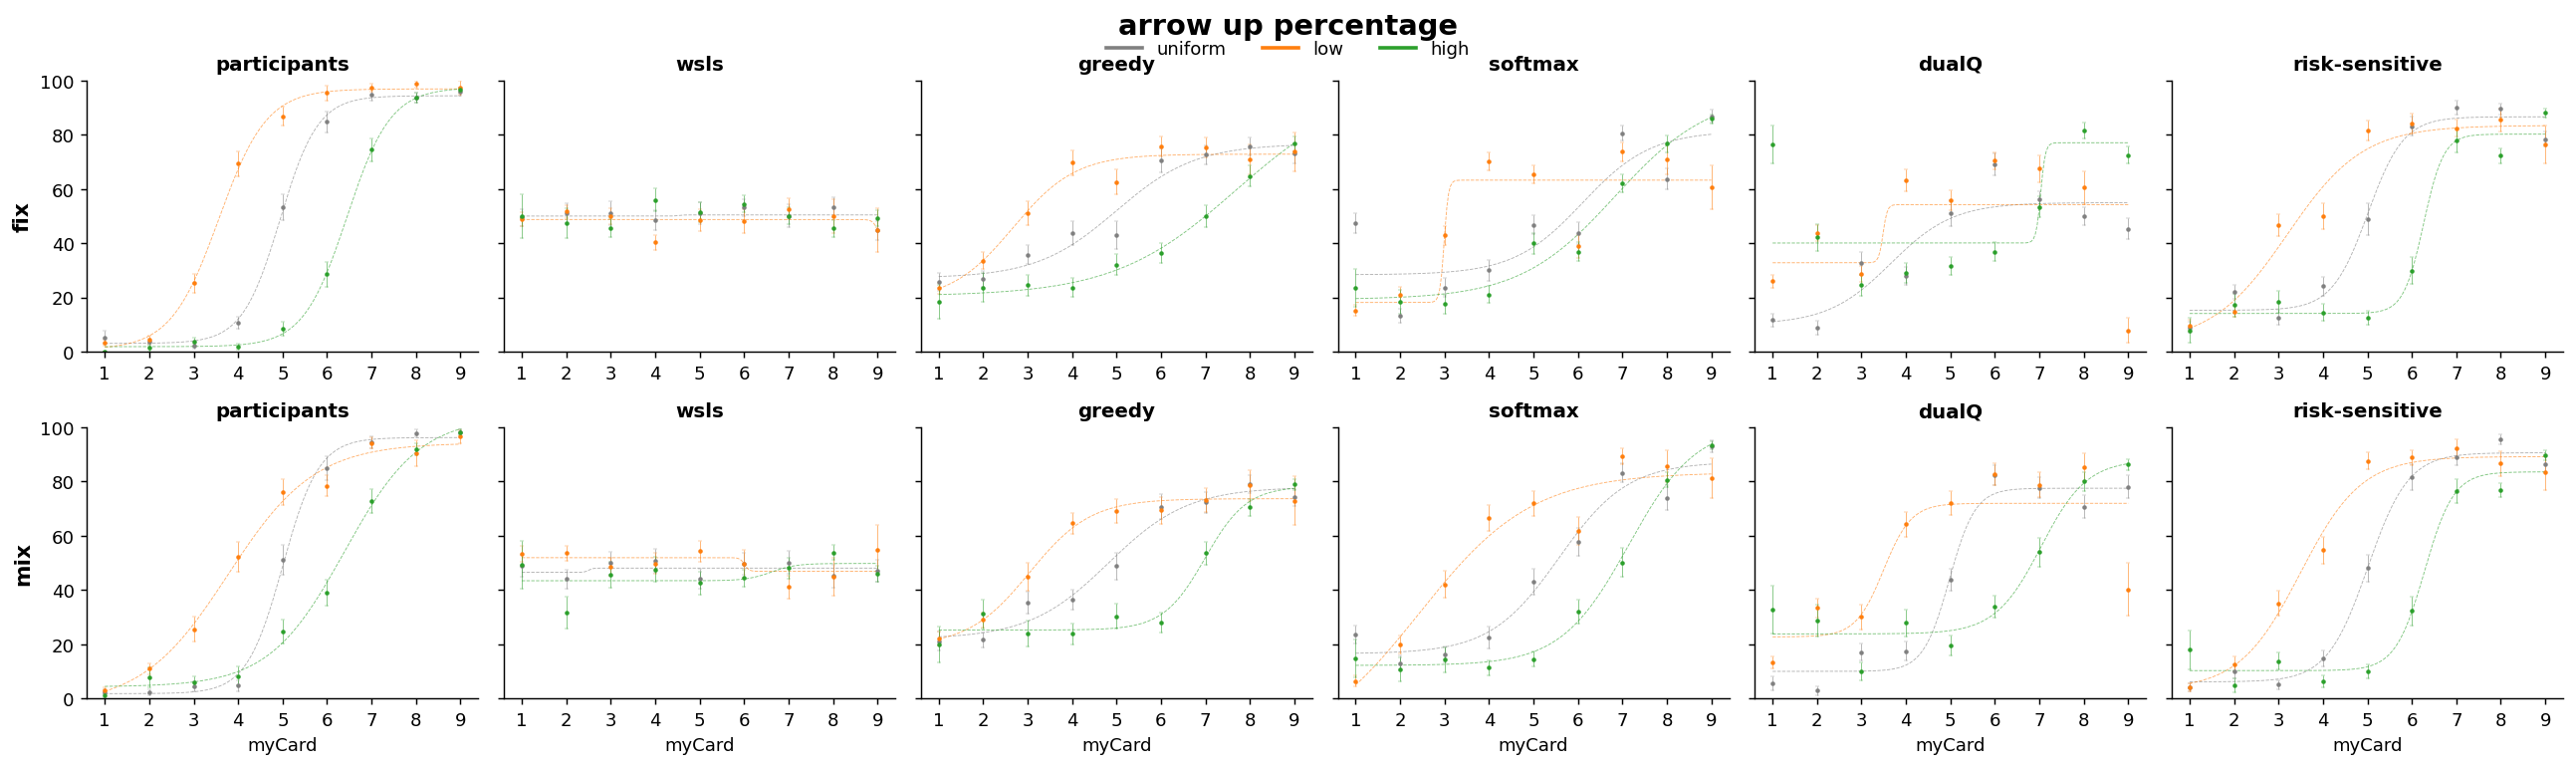

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# Color and dist setup
distributions = ['uniform', 'low', 'high']
colors = {'uniform': '#808080', 'low': '#ff7f0e', 'high': '#2ca02c'}
models = [
    (df_participants, 'participants', 'choice'),
    (df_wsls, 'wsls', 'model_choices'),
    (df_greedy, 'greedy', 'model_choices'),
    (df_softmax, 'softmax', 'model_choices'),
    (df_dualQ, 'dualQ', 'model_choices'),
    (df_rs, 'risk-sensitive', 'model_choices'),
]

# Sigmoid function
def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

# Compute arrow-up percentages by card
def compute_arrowup_stats(dataframes, dist, block_type, choice_col):
    group_results = []

    for df in dataframes:
        sub_df = df[(df['distribution'] == dist) & (df['block_type'] == block_type)].copy()
        sub_df['group'] = sub_df['myCard'].astype(str)

        if choice_col != 'choice':
            sub_df[choice_col] = sub_df[choice_col].map({1: 'arrowup', 0: 'arrowdown'})

        group_counts = sub_df.groupby(['group', choice_col], observed=True)[choice_col].count().unstack(fill_value=0)
        group_totals = group_counts.sum(axis=1)
        group_percentages = (group_counts.T / group_totals).T * 100
        group_percentages['group'] = group_percentages.index
        group_results.append(group_percentages.reset_index(drop=True))

    if not group_results:
        return None, None, None

    combined_df = pd.concat(group_results)
    mean_df = combined_df.groupby('group', observed=True).mean().reset_index()
    sem_df = combined_df.groupby('group', observed=True).sem().reset_index()
    return mean_df, sem_df, mean_df['group']

# Plotting
fig, axes = plt.subplots(2, 6, figsize=(20, 6), dpi=130, sharey=True)

for col, (df_group, label, choice_col) in enumerate(models):
    for row, block_type in enumerate(['fix', 'mix']):
        ax = axes[row, col]

        for dist in distributions:
            mean_df, sem_df, groups = compute_arrowup_stats(df_group, dist, block_type, choice_col)
            if mean_df is None:
                continue

            arrow_up = mean_df.get('arrowup', 0).values
            sem_up = sem_df.get('arrowup', 0).values
            x = np.arange(len(groups))
            color = colors[dist]

            # Errorbars
            ax.errorbar(x, arrow_up, yerr=sem_up, fmt='o', color=color,
                        capsize=1, capthick=0.2, markersize=1.5, elinewidth=0.3, label=dist)
           
           
           
            with warnings.catch_warnings():
                warnings.simplefilter("error", OptimizeWarning)

                if len(np.unique(arrow_up)) > 2:
                    try:
                        p0 = [max(arrow_up), np.median(x), 1, min(arrow_up)]
                        popt, _ = curve_fit(sigmoid, x, arrow_up, p0, maxfev=20000)
                        x_smooth = np.linspace(x.min(), x.max(), 200)
                        y_smooth = sigmoid(x_smooth, *popt)
                        ax.plot(x_smooth, y_smooth, color=color, linewidth=0.5, alpha=0.6, linestyle='--')
                    except (RuntimeError, OptimizeWarning, ValueError) as e:
                        print(f"Fit failed for {label} | block: {block_type} | dist: {dist}: {e}")

        ax.set_xticks(x)
        ax.set_xticklabels(groups)
        ax.set_ylim(0, 100)

        if row == 1:
            ax.set_xlabel("myCard", fontsize=10)
        if col == 0:
            ax.set_ylabel(f"{block_type}", fontsize=12, fontweight='bold')

        ax.set_title(label, fontsize=11, weight='bold')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

# Legend only once – below the plots
handles = [plt.Line2D([0], [0], color=colors[d], lw=2, label=d) for d in distributions]
fig.legend(
    handles=handles,
    loc='lower center',
    bbox_to_anchor=(0.5,0.9), 
    ncol=3,
    frameon=False
)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('arrow up percentage', fontsize=16, fontweight='bold')
plt.savefig(os.path.join(output_dir, "arrowup_percentage.pdf"), format="pdf", dpi=1200, bbox_inches="tight")
plt.show()
